In [1]:
import requests
import pandas as pd
import io
import numpy as np

In [2]:
response = requests.get("https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv")

In [3]:
data=pd.read_csv(io.StringIO(response.content.decode('utf-8')))

In [4]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,852,852,852,852,852,852,852,853,853
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,86,86,88,91,92,96,113,118,130,138


In [5]:
aggregated_data = data.groupby("Country/Region").sum()

In [6]:
aggregated_data["4/9/20"].sum()

1567423

In [7]:
cases_url = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"
recov_url = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv"
deaths_url= "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv"

def correct_colnames(df):
    dates = list(df.columns)[4:]
    dates = list(map(lambda x: (x + "20"), dates))
    df.columns = [ *list(df.columns)[:4], *dates]
    
    return df, datesresponse = requests.get(cases_url)
data=pd.read_csv(io.StringIO(response.content.decode('utf-8')))

SyntaxError: invalid syntax (<ipython-input-7-15d6d590e0df>, line 10)

In [21]:
def correct_colnames(df):
    dates = list(df.columns)[4:]
    dates = list(map(lambda x: (x + "20"), dates))
    df.columns = [ *list(df.columns)[:4], *dates]
    
    return df.groupby("Country/Region").sum(), dates

cases_url = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"
recov_url = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv"
deaths_url= "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv"

response = requests.get(cases_url)
data_cases = correct_colnames(pd.read_csv(io.StringIO(response.content.decode('utf-8'))))[0]

response = requests.get(recov_url)
data_recov = correct_colnames(pd.read_csv(io.StringIO(response.content.decode('utf-8'))))[0]

response = requests.get(deaths_url)
data_deaths = correct_colnames(pd.read_csv(io.StringIO(response.content.decode('utf-8'))))[0]

In [ ]:
data_cases = data_cases.reset_index()

In [ ]:
# list(data_cases[data_cases["Country/Region"].str.lower() == "nigeria"].iloc[0])[3:]

In [ ]:
data_deaths

In [ ]:
pd.set_option('display.max_rows', 1000)
correct_colnames(data)[0]

In [ ]:
from bs4 import BeautifulSoup as bs4

In [ ]:
wiki_url = "https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic_by_country_and_territory#Pandemic_by_country_and_territory"
data = requests.get(wiki_url)

In [ ]:
html = bs4(data.content)

In [ ]:
table = html.find('tr')

In [ ]:
table

In [ ]:
dfs = pd.read_html(wiki_url,header=0)

In [ ]:
dataframe = dfs[1]

In [ ]:
dataframe.head()

In [ ]:
dataframe.columns = ["province", "countries", "cases", "deaths", "recoveries", "err1"]

In [ ]:
dataframe = dataframe.replace( "–", 0 )

In [ ]:
dataframe.iloc[1:-2].cases.astype("int").sum()

In [ ]:
dataframe[dataframe.countries == "Nigeria"]

In [ ]:
# dataframe = dataframe.drop(columns = ["province"])

In [ ]:
dfs = pd.read_html(wiki_url,header=0)
dataframe = dfs[1]
dataframe.columns = ["province", "countries", "cases", "deaths", "recoveries", "err1"]
dataframe = dataframe.drop(columns = ["province"])
dataframe = dataframe.replace( "–", 0 )

country_name = ""
cases = 0
deaths = 0
recoveries = 0

total_cases = 0
total_deaths = 0
total_recoveries = 0

global_data = dataframe.iloc[0]

global_cases = int(global_data["countries"].encode("ascii", errors="ignore").decode().replace(",",""))
global_deaths = int(global_data["cases"].encode("ascii", errors="ignore").decode().replace(",",""))
global_recoveries = int(global_data["deaths"].encode("ascii", errors="ignore").decode().replace(",",""))

print(global_cases, global_deaths, global_recoveries)
for i in range(1, len(dataframe)):
    data = (dataframe.iloc[i])

    try :
        if not isinstance(data[0], float):
#             print( data )
            country_name = data["countries"].split("[")[0]
            cases = data["cases"]
            deaths = data["deaths"]
            recoveries = data["recoveries"]
            
            print(country_name, cases, deaths, recoveries, sep = " -||- ")
    except TypeError:
        pass

In [ ]:
students = {'hours': [29, 9, 10, 38, 16, 26, 50, 10, 30, 33, 43, 2, 39, 15, 44, 29, 41, 15, 24, 50],
            'test_results': [65, 7, 8, 76, 23, 56, 100, 3, 74, 48, 73, 0, 62, 37, 74, 40, 90, 42, 58, 100]}

In [ ]:
qs = qss[:]
len(qs)

In [ ]:
x1d = np.polyfit(students["hours"], students["test_results"], 1 )
x2d = np.polyfit(students["hours"], students["test_results"], 1 )

In [ ]:
from sklearn.metrics import r2_score
import numpy as np

def create_model(data):
    
    model = np.polyfit(list(range(len(data))), data, 4 )
    predict = np.poly1d(model)
    accuracy = r2_score(qs, predict(list(range(len(qs)))))
    
    return predict, accuracy

In [ ]:
predictor, accuracy = create_model(qs)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
xp = np.linspace(0, 100, 100)
_ = plt.plot(list(range(len(qs))), qs, '.',  predict1(xp), '--')
plt.ylim(-20,1000)
plt.xlim(-2,60)
plt.show()

In [ ]:
q = [(0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (2,), (2,), (2,), (2,), (2,), (2,), (2,), (2,), (3,), (8,), (8,), (12,), (22,), (30,), (40,), (44,), (51,), (65,), (70,), (89,), (111,), (131,), (135,), (174,), (184,), (210,), (214,), (232,), (238,), (254,), (276,), (288,), (305,), (318,), (323,), (343,), (373,), (407,), (442,), (541,)]
qss = []

In [ ]:
for item in q:
    qss.append(item[0])

In [ ]:
data[data["Country/Region"] == "Nigeria"]

In [ ]:
dates = data.columns[::10]

In [ ]:
dates

In [ ]:
algeria = data.iloc[2][::10]
nigeria = data.iloc[173][::10]

In [ ]:
plt.figure( figsize=(13, 6))
plt.plot(dates, algeria, label = "algeria")
plt.plot(dates, nigeria, label = "nigeria")
plt.xticks(rotation=90)
plt.xlabel("Cases")
plt.ylabel("Date Measured")
plt.legend()
plt.title("Covid Cases Comparison")
plt.savefig("plot.pdf")

In [29]:
# Load libraries
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

# Create example dataframe
df = pd.DataFrame({
'x': [1, 1.1, 1.2, 2, 5],
'y': [5, 15, 7, 10, 2],
's': [1000,2000,3000,4000,5000],
'group': ['Stamford','Yale','Harvard','MIT','Cambridge']
})

#Create figure
plt.figure(figsize = (10,7))

# Create scatterplot. alpha controls the opacity and s controls the size.
ax = sns.scatterplot(df.x, df.y, alpha = 0.5,s = df.s)

ax.set_xlim(0,6)
ax.set_ylim(-2, 18)
#For each point, we add a text inside the bubble
for line in range(0,df.shape[0]):
     ax.text(df.x[line], df.y[line], df.group[line], horizontalalignment='center', size='medium', color='black', weight='semibold')

In [ ]:
# Load libraries
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

# Create example dataframe
df = pd.DataFrame({
'Sleep_Hours': [2,4,3,1,2],
'Reading_Hours': [6,3,7,5,2],
'Score': [20,70,40,15,50],
'Names': ['Bola','Sinzu', "Bala",'Hushpuppi','Spending']
})

#Create figure
plt.figure(figsize = (10,7))

# Create scatterplot. alpha controls the opacity and s controls the size.
ax = sns.scatterplot(df.Reading_Hours, df.Sleep_Hours, alpha = 0.5,s = df.Score*100)

ax.set_xlim(0,10)
ax.set_ylim(-2, 6)
print(df.shape[0])
#For each point, we add a text inside the bubble
for line in range(0,df.shape[0]):
     ax.text(df.Reading_Hours[line], df.Sleep_Hours[line], df.Names[line], horizontalalignment='center', size='medium', color='black', weight='semibold')

In [24]:
cases_url = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"
recov_url = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv"
deaths_url= "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv"

cases_response = requests.get(cases_url)
recov_response = requests.get(recov_url)
deaths_response = requests.get(deaths_url)

cases=pd.read_csv(io.StringIO(cases_response.content.decode('utf-8')))
recoveries=pd.read_csv(io.StringIO(recov_response.content.decode('utf-8')))
deaths=pd.read_csv(io.StringIO(deaths_response.content.decode('utf-8')))

In [45]:
requested_country = input("Please enter country name : ")
requested_date = input("Please enter required date : ")

Please enter country name : Argentina
Please enter required date : 6/13/20


In [46]:
filtered_cases= cases[data["Country/Region"].str.contains(requested_country)]
filtered_recoveries = recoveries[data["Country/Region"].str.contains(requested_country)]
filtered_deaths = deaths[data["Country/Region"].str.contains(requested_country)]

case_data = int(filtered_cases[requested_date])
recov_data = int(filtered_recoveries[requested_date])
death_data = int(filtered_deaths[requested_date])

print(case_data, recov_data, death_data)

# if filtered_data.shape[0] > 1:
#     print("Sorry more than 1 results were found confirm again : \n")
#     print(filtered_data["Country/Region"], "\n")
#     full_requested_country = input("Please re-enter with options above : ")
#     filtered_data = data[data["Country/Region"].str.contains(full_requested_country)]

30295 9083 815


C:\Users\INYANG\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0.5,1,'ARGENTINA 6/13/20')

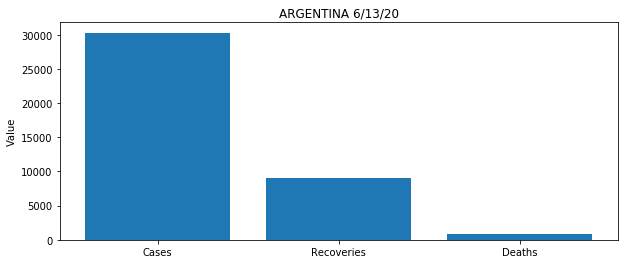

In [47]:
plt.figure(figsize = (10,4))
plt.bar(['Cases', 'Recoveries', 'Deaths'], [case_data, recov_data, death_data])
plt.ylabel("Value")
plt.title(f'{requested_country.upper()} {requested_date}')


In [33]:
filtered_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
173,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,11516,11844,12233,12486,12801,13464,13873,14554,15181,15682


In [56]:
def plot_as_list(countries_and_dates):
    
    for country, date in countries_and_dates:
    
        requested_country = country
        requested_date = date

        filtered_cases= cases[data["Country/Region"].str.contains(requested_country)]
        filtered_recoveries = recoveries[data["Country/Region"].str.contains(requested_country)]
        filtered_deaths = deaths[data["Country/Region"].str.contains(requested_country)]

        case_data = int(filtered_cases[requested_date])
        recov_data = int(filtered_recoveries[requested_date])
        death_data = int(filtered_deaths[requested_date])

        print(case_data, recov_data, death_data)

        plt.figure(figsize = (10,4))
        plt.bar(['Cases', 'Recoveries', 'Deaths'], [case_data, recov_data, death_data])
        plt.ylabel("Value")
        plt.title(f'{requested_country.upper()} {requested_date}')
        plt.savefig(f"{country}.jpeg")

C:\Users\INYANG\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


323 109 10


C:\Users\INYANG\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


130 42 5


C:\Users\INYANG\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


103 68 11


C:\Users\INYANG\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


4851 11 56


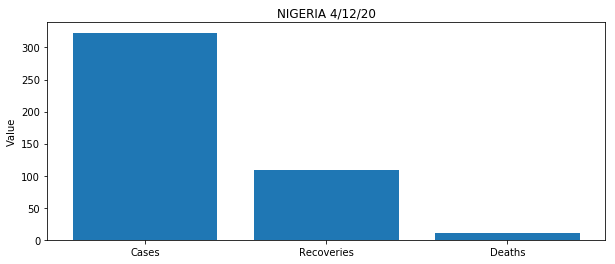

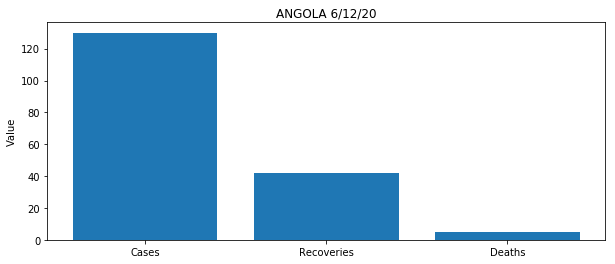

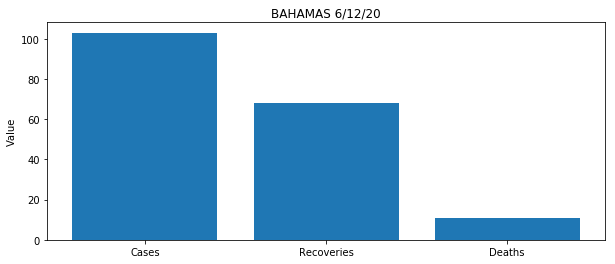

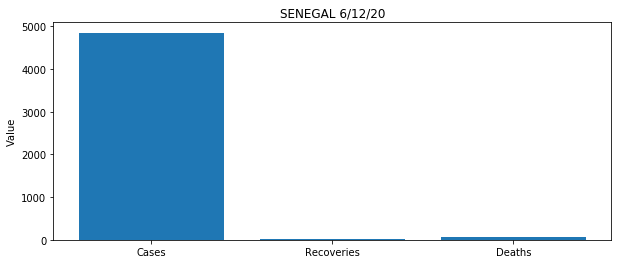

In [58]:
list_of_countries_and_dates = [("Nigeria", "4/12/20"), ("Angola", "6/12/20"), ("Bahamas", "6/12/20"), ("Senegal", "6/12/20")]

plot_as_list(list_of_countries_and_dates)

In [66]:
x = list(data.columns[4:])
df = pd.DataFrame()
df["datestr"] = x

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 1 columns):
datestr    144 non-null object
dtypes: object(1)
memory usage: 1.2+ KB


In [73]:
df["datetime"] = pd.to_datetime(df.datestr)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
datestr     144 non-null object
datetime    144 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 2.3+ KB
